In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [7]:
import pandas as pd
df = pd.read_csv("C:/Users/Ritesh Yadav/OneDrive/Desktop/DMart.csv")

In [9]:
df.shape

(5189, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [13]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  
0  Grocery > Grocery/Dry Fruits  
1  Grocery > Grocery/Dry Fruits  
2  Grocery > Grocery/Dry Fruits  
3          Grocery > Dry Fruits  
4          Grocery > Dry Fruits

In [15]:
df[['SubCategory','BreadCrumbs']].tail(100)

SubCategory                       BreadCrumbs
5089            School Needs    School Supplies > School Needs
5090  Salt / Sugar / Jaggery  Grocery > Salt / Sugar / Jaggery
5091  Salt / Sugar / Jaggery  Grocery > Salt / Sugar / Jaggery
5092        Personal Hygiene  Personal Care > Personal Hygiene
5093            School Needs    School Supplies > School Needs
...                      ...                               ...
5184            School Needs    School Supplies > School Needs
5185            School Needs    School Supplies > School Needs
5186            School Needs    School Supplies > School Needs
5187            School Needs    School Supplies > School Needs
5188            School Needs    School Supplies > School Needs

[100 rows x 2 columns]

In [17]:
df['Quantity'].unique()

array(['500 gm', '100 gm', '200 gm', '1 kg', '400 gm', '5 kg', '250 gm',
       '1 Kg', '150 gm', '450 gm', '50 gm', '1 L', '900 gm', '20 gm',
       '10 gm', '4 pcs', '5 L', '15 L', '5  L', '500 ml', '2 L', '200 ml',
       '250 ml', '2x1L', '225 ml', '10 kg', '5 Kg', ' 5 kg', '25 gm',
       '350 gm', '72 gm', ' 50 gm', '35 gm', '60 gm', '120 gm', '80 gm',
       '5 U', '40 gm', '700 gm', '1 gm', '45 gm', '7 gm', '75 gm',
       '20 ml', '1.5 kg', '25 Bags', '100 Bags', '10 Bags', '50 Bags',
       '140 gm', '168 gm', '16 Bags', '180 ml', '1 L x 12 U', '476 gm',
       '750 gm', '663 gm', '600 gm', '180 gm', '160 gm', '20 Bag',
       '2x500 gm', '95 gm', '48 gm', '5x65 ml', '380 gm', '10 U',
       '150 ml', '85 gm', '90 gm', '225 gm', '2.25 L', '600 ml', '1.75 L',
       '8x250 ml', '750 ml', '300 ml', '6x330 ml', '330 ml', '750  ml',
       '1.2 L', '6x250 ml', '4x250 ml', '350 ml', '623 gm', '253 gm',
       '143 gm', '584 gm', '4X100 gm', '300 gm', '138 gm', '276 gm',
       '12

In [19]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

In [23]:
df['Name'] = df['Name'].fillna('Kitchen Appliance')
df['Brand'] = df['Brand'].fillna('Local/Unknown')
df[df['Price'].isnull()==True]

Name    Brand  Price  \
4323  Elle 18 Nail Pops Nail Colour - Shade 125  Elle 18    NaN   

      DiscountedPrice       Category              SubCategory Quantity  \
4323              NaN  Personal Care  Personal Care/Nail Care     5 ml   

     Description                              BreadCrumbs  
4323         NaN  Personal Care > Personal Care/Nail Care

In [25]:
    df['Price']=df['Price'].fillna(df[df['SubCategory']=='Personal Care/Nail Care']['Price'].mean())

In [27]:
df['DiscountedPrice']=df['DiscountedPrice'].fillna(df[df['SubCategory']=='Personal Care/Nail Care']['DiscountedPrice'].mean())
df[df['Category'].isnull()==True]

Name              Brand   Price  \
3180  Stainless Steel Idli Maker with Lid  Keyur Kitchenware   900.0   
3243  Pigeon ESS Non-Stick Gift Set - Red             Pigeon  2895.0   
3245          Wonderchef Milano Set - Red         Wonderchef  4200.0   

      DiscountedPrice Category SubCategory Quantity  \
3180            499.0      NaN         NaN   1 Unit   
3243           1359.0      NaN         NaN    7 pcs   
3245           1999.0      NaN         NaN    4 Pcs   

                                            Description BreadCrumbs  
3180  \n- Container Material : Stainless Steel\n- Ha...         NaN  
3243  \n-Specifications :\n- Coating : 5 Layers Non-...         NaN  
3245  \n- Adorn your kitchen with this beautiful Mil...         NaN

In [29]:
df['Category'] = df['Category'].fillna('Home & Kitchen')

In [31]:
df['SubCategory'] = df['SubCategory'].fillna('Home Appliances')

In [33]:
df[df.Quantity.isnull()==True]

Name Brand   Price  \
5047  Zeel MT212 Men's Raincoat - Navy Blue : Size XXL  Zeel  1199.0   

      DiscountedPrice  Category SubCategory Quantity  \
5047           1049.0  Raincoat    Raincoat      NaN   

                                            Description BreadCrumbs  
5047  Specifications- Material : Fabric- Colour : Na...    Raincoat

In [35]:
df['Quantity'] = df['Quantity'].fillna('Size XXL')

In [37]:
df['Description'] = df['Description'].fillna('No Desciption')

In [39]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        3
dtype: int64

In [41]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  
0  Grocery > Grocery/Dry Fruits  
1  Grocery > Grocery/Dry Fruits  
2  Grocery > Grocery/Dry Fruits  
3          Grocery > Dry Fruits  
4          Grocery > Dry Fruits

In [43]:
df['DiscountPercent'] = (df['Price']-df['DiscountedPrice'])*100/df['Price']

In [45]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        3
DiscountPercent    1
dtype: int64

In [47]:
df[df['DiscountPercent'].isnull()==True]

Name   Brand  Price  DiscountedPrice  \
2230  Kopiko Cappuccino Coffee Candies  Kopiko    0.0              0.0   

           Category SubCategory Quantity  \
2230  Packaged Food      Sweets   140 gm   

                                            Description  \
2230  OverviewKopiko candy is made from real coffee ...   

                 BreadCrumbs  DiscountPercent  
2230  Packaged Food > Sweets              NaN

In [49]:
df['DiscountPercent'] = df['DiscountPercent'].fillna(0)

In [51]:
df['DiscountPercent']=df['DiscountPercent'].apply(lambda x:int(x))

In [53]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category         SubCategory Quantity Description  \
0  Grocery  Grocery/Dry Fruits   500 gm       India   
1  Grocery  Grocery/Dry Fruits   100 gm       India   
2  Grocery  Grocery/Dry Fruits   200 gm       India   
3  Grocery          Dry Fruits   500 gm         USA   
4  Grocery          Dry Fruits     1 kg         USA   

                    BreadCrumbs  DiscountPercent  
0  Grocery > Grocery/Dry Fruits               27  
1  Grocery > Grocery/Dry Fruits               22  
2  Grocery > Grocery/Dry Fruits               13  
3          Grocery > Dry Fruits               41  
4          Grocery > Dry Fruits               57

In [55]:
df['SubCategory'].unique()

array(['Grocery/Dry Fruits', 'Dry Fruits', 'Dals', 'Pulses',
       'Masala & Spices', 'Grocery/Salt / Sugar / Jaggery',
       'Ghee & Vanaspati', 'Grocery/Rice & Rice Products',
       'Grocery/Masala & Spices', 'Grocery/Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Flours & Grains',
       'Rice & Rice Products', 'DMart Grocery/Rice & Rice Products',
       'Pickles', 'Salt / Sugar / Jaggery', 'Snacks & Farsans',
       'Beverages', 'DMart Grocery', 'Dairy', 'Biscuits & Cookies',
       'Bakery', 'Personal Care', 'Ready To Cook', 'Breakfast Cereals',
       'Packaged Food', 'Sweets', 'Ketchup & Sauce', 'Jams & Spreads',
       'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Home & Kitchen/Tissue Paper & Napkins',
       'Kitchen Aprons', 'Home Appli

In [57]:
df['SubCategory'] = df['SubCategory'].apply(lambda x: x.split('/')[-1])

In [59]:
df['SubCategory'].unique()

array(['Dry Fruits', 'Dals', 'Pulses', 'Masala & Spices', ' Jaggery',
       'Ghee & Vanaspati', 'Rice & Rice Products', 'Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Pickles',
       'Snacks & Farsans', 'Beverages', 'DMart Grocery', 'Dairy',
       'Biscuits & Cookies', 'Bakery', 'Personal Care', 'Ready To Cook',
       'Breakfast Cereals', 'Packaged Food', 'Sweets', 'Ketchup & Sauce',
       'Jams & Spreads', 'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Kitchen Aprons', 'Home Appliances',
       'Wonderchef', 'Water Purifiers & Accessories', 'Home Utility',
       'Tableware', 'Butterfly', 'Cookware & Serveware',
       'Festive Specials', 'Joyo Plastics', 'Pooja Needs', 'Geep',
       'Zebronics', 'Skin Care', 'Face Care', 'Eye Makeup', 'Lip Car

In [61]:
df.head()

Name   Brand   Price  DiscountedPrice  \
0             Premia Badam (Almonds)  Premia   451.0            329.0   
1             Premia Badam (Almonds)  Premia   109.0             85.0   
2             Premia Badam (Almonds)  Premia   202.0            175.0   
3  Nutraj California Almonds (Badam)  Nutraj   599.0            349.0   
4  Nutraj California Almonds (Badam)  Nutraj  1549.0            659.0   

  Category SubCategory Quantity Description                   BreadCrumbs  \
0  Grocery  Dry Fruits   500 gm       India  Grocery > Grocery/Dry Fruits   
1  Grocery  Dry Fruits   100 gm       India  Grocery > Grocery/Dry Fruits   
2  Grocery  Dry Fruits   200 gm       India  Grocery > Grocery/Dry Fruits   
3  Grocery  Dry Fruits   500 gm         USA          Grocery > Dry Fruits   
4  Grocery  Dry Fruits     1 kg         USA          Grocery > Dry Fruits   

   DiscountPercent  
0               27  
1               22  
2               13  
3               41  
4               57

In [63]:
df.describe()

Price  DiscountedPrice  DiscountPercent
count   5189.000000      5189.000000      5189.000000
mean     343.982540       236.636557        26.023126
std      600.986036       387.168767        15.203967
min        0.000000         0.000000         0.000000
25%       85.000000        64.000000        14.000000
50%      175.000000       125.000000        22.000000
75%      345.000000       249.000000        35.000000
max    10990.000000      7999.000000        98.000000

In [65]:
df[df['DiscountPercent']==98]

Name   Brand  Price  DiscountedPrice  \
2191     Naagin Indian Hot Sauce - Original  Naagin   50.0              1.0   
2192  Naagin Indian Hot Sauce - Smoky Bhoot  Naagin   50.0              1.0   
2193  Naagin Indian Hot Sauce - Kantha Bomb  Naagin   50.0              1.0   

           Category   SubCategory Quantity  \
2191  Packaged Food  Gourmet Food    40 gm   
2192  Packaged Food  Gourmet Food    40 gm   
2193  Packaged Food  Gourmet Food    40 gm   

                                            Description  \
2191  While we work to ensure that the product infor...   
2192  While we work to ensure that the product infor...   
2193  While we work to ensure that the product infor...   

                       BreadCrumbs  DiscountPercent  
2191  Packaged Food > Gourmet Food               98  
2192  Packaged Food > Gourmet Food               98  
2193  Packaged Food > Gourmet Food               98

Distribution of Price


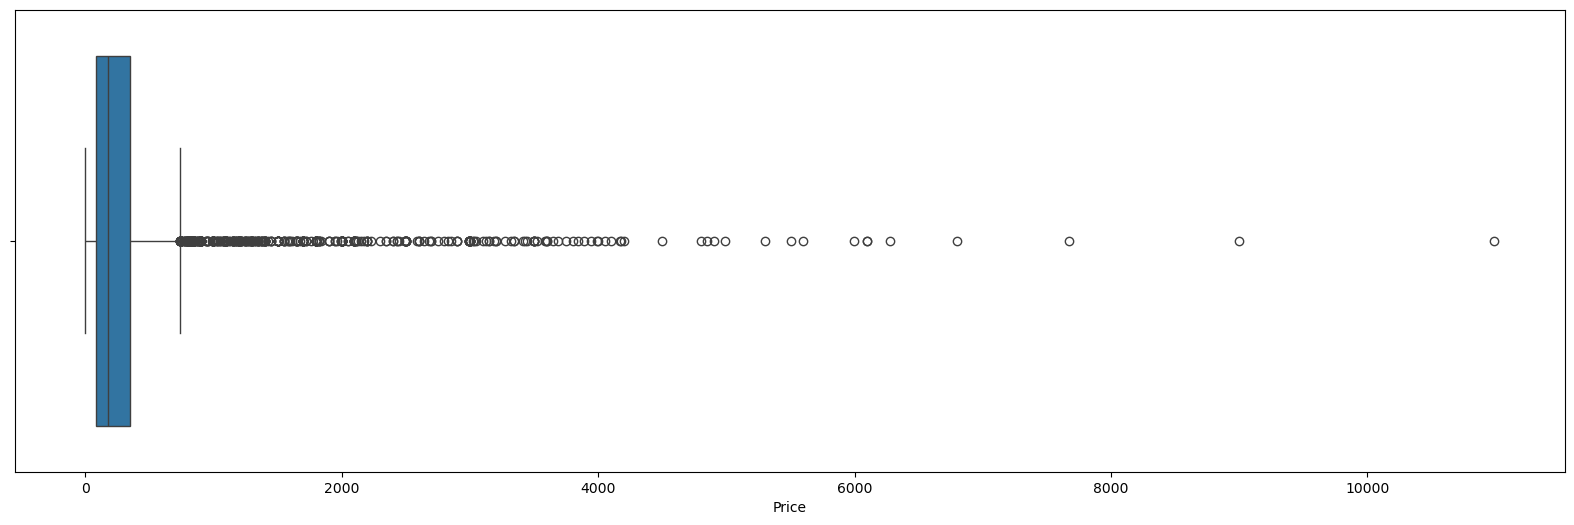

Distribution of DiscountedPrice


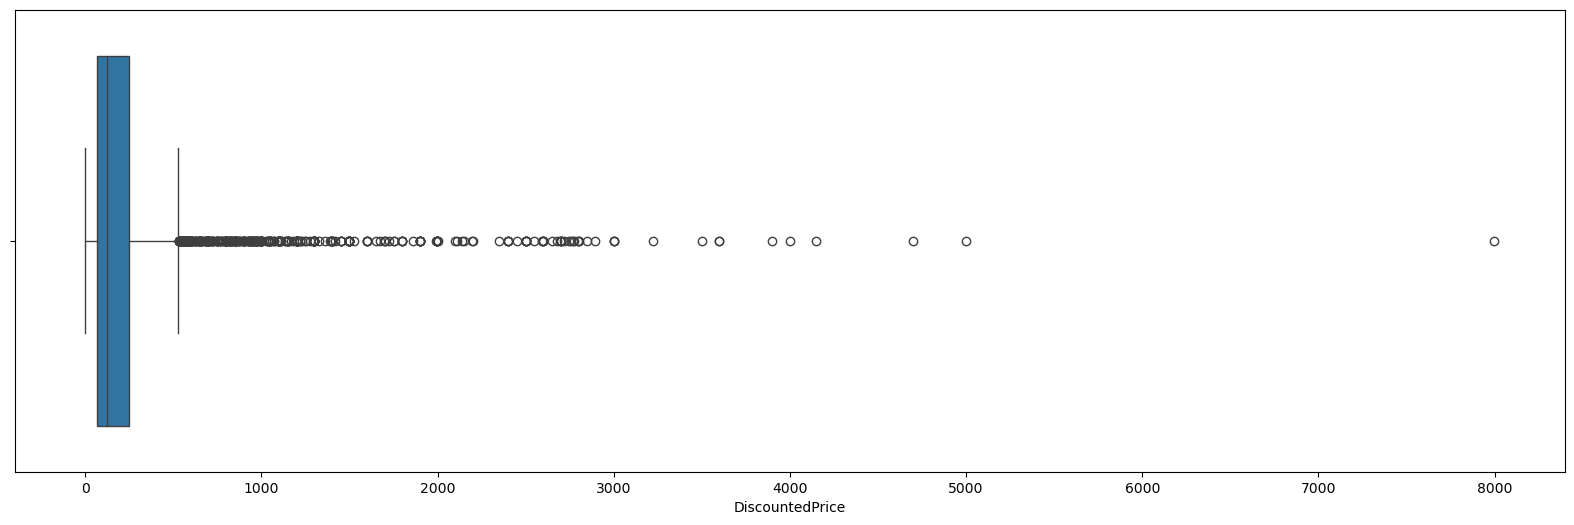

Distribution of DiscountPercent


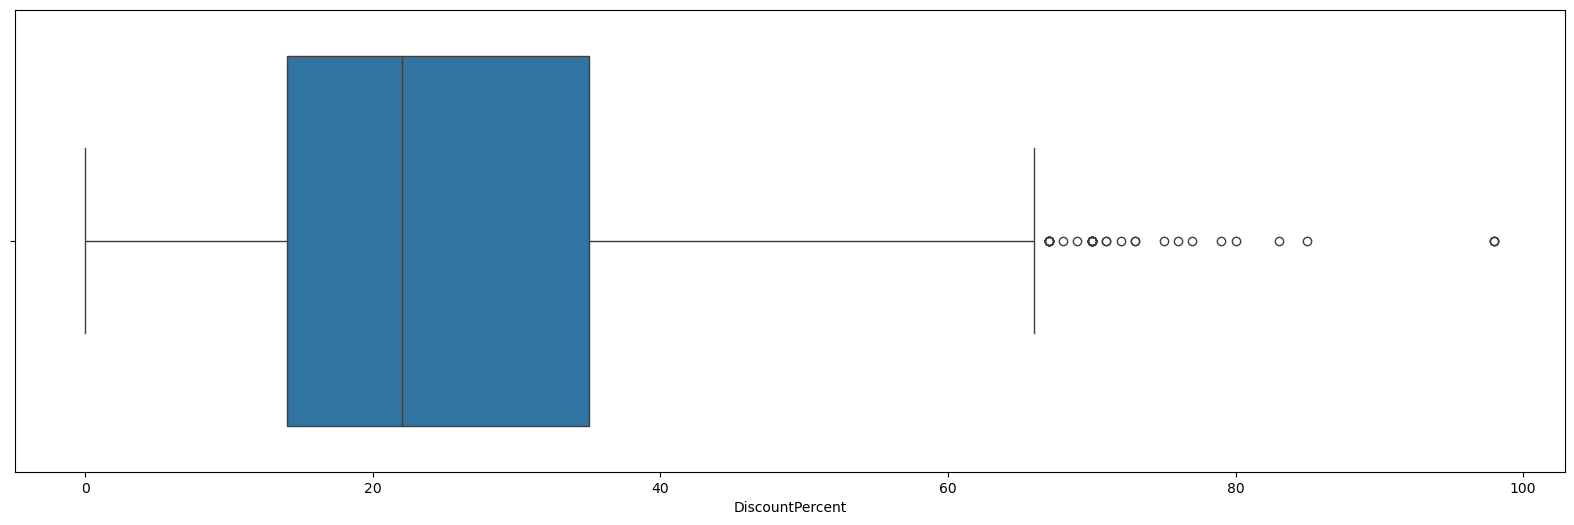

In [67]:
cols = ['Price','DiscountedPrice','DiscountPercent']

for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.boxplot(x = df[i])
    plt.show()

Distribution of Price


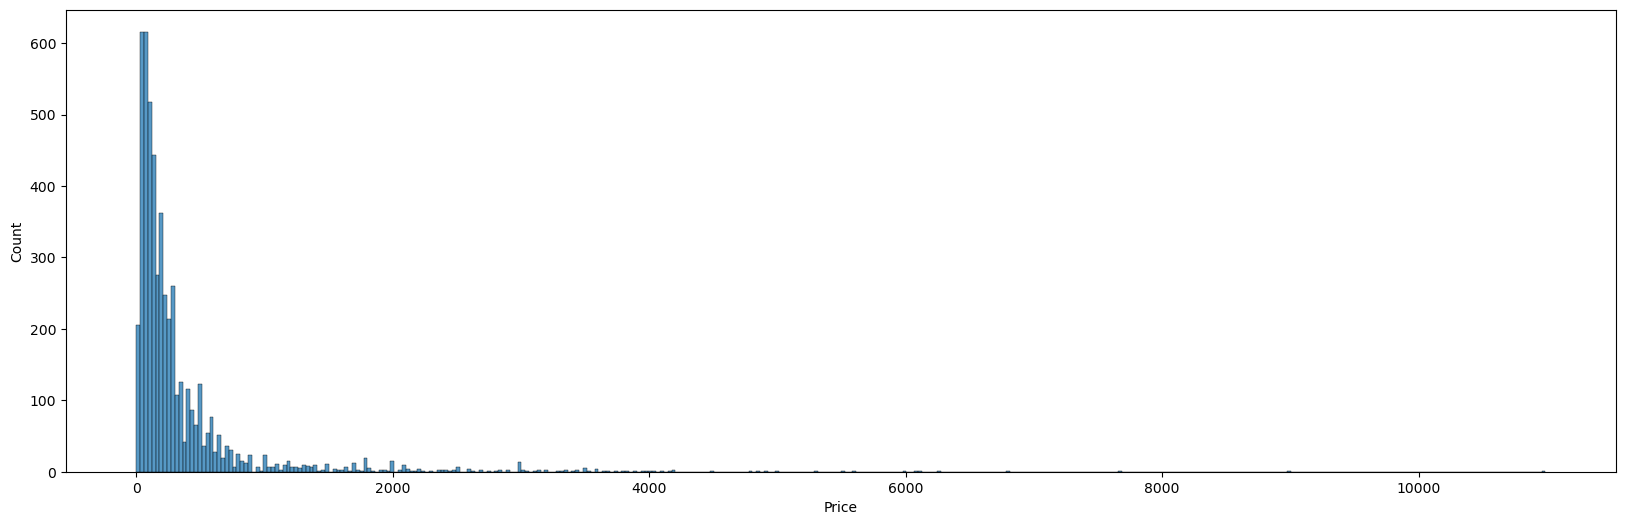

Distribution of DiscountedPrice


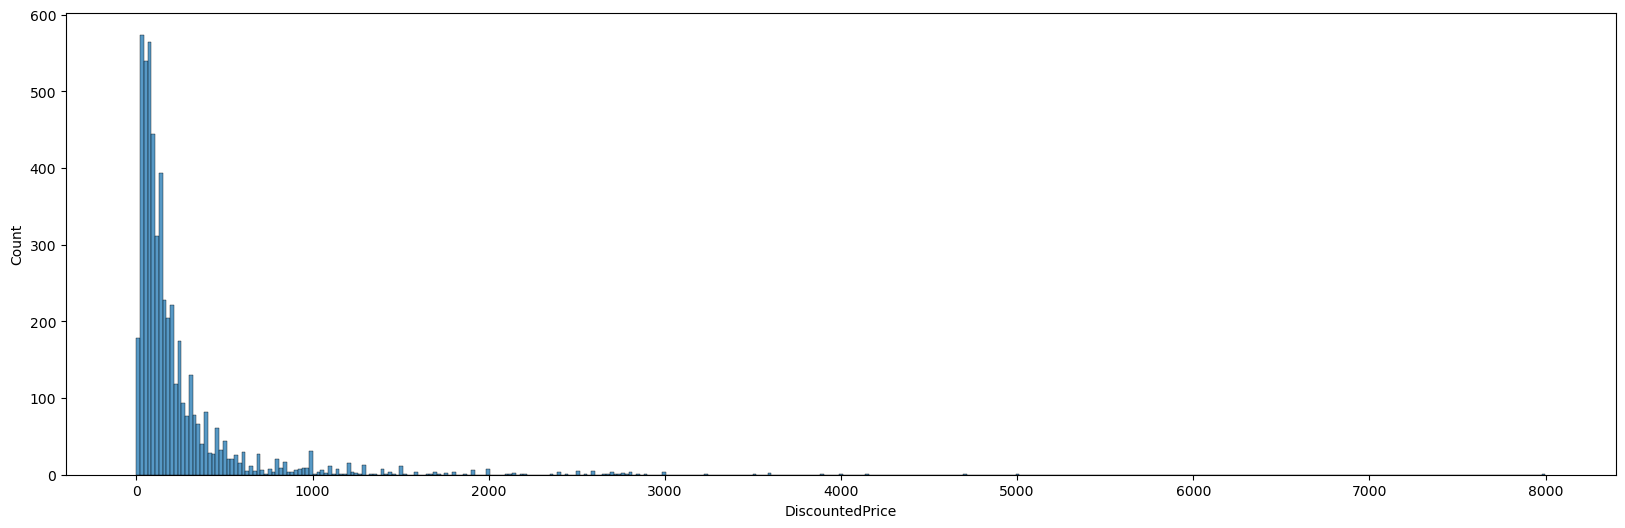

Distribution of DiscountPercent


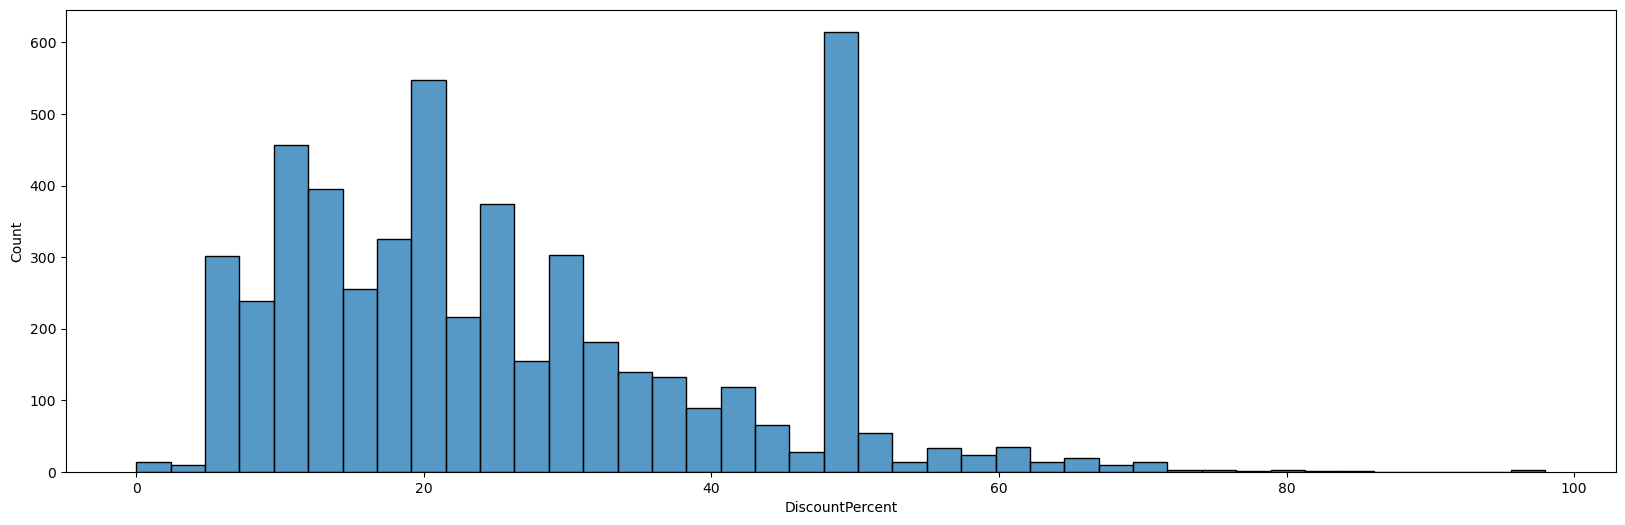

In [68]:
for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.histplot(x = df[i])
    plt.show()

In [70]:
df.head(2)

Name   Brand  Price  DiscountedPrice Category  \
0  Premia Badam (Almonds)  Premia  451.0            329.0  Grocery   
1  Premia Badam (Almonds)  Premia  109.0             85.0  Grocery   

  SubCategory Quantity Description                   BreadCrumbs  \
0  Dry Fruits   500 gm       India  Grocery > Grocery/Dry Fruits   
1  Dry Fruits   100 gm       India  Grocery > Grocery/Dry Fruits   

   DiscountPercent  
0               27  
1               22

In [71]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
text = "".join(d for d in df['Description'])

In [77]:
wc = WordCloud(width= 1600,height=800,colormap='prism',background_color = 'white').generate(text)

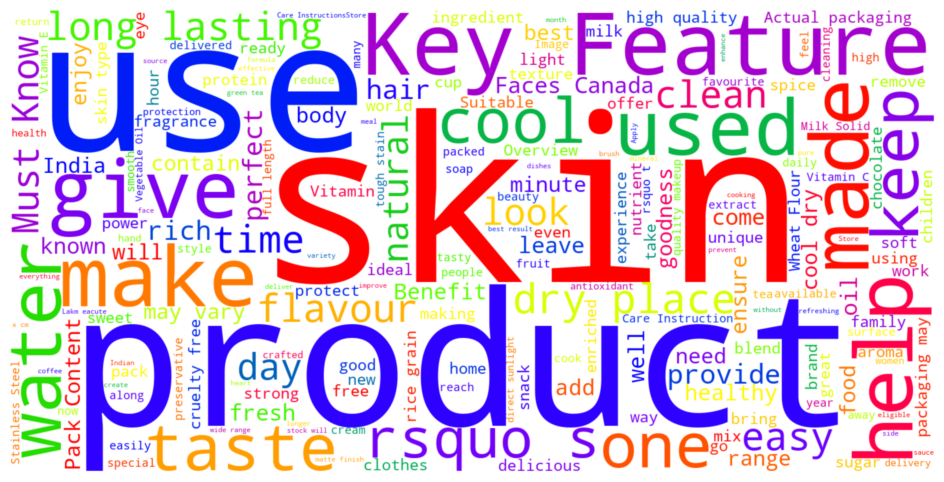

In [78]:
plt.figure(figsize = (30, 6))
plt.imshow(wc, interpolation="gaussian")
plt.axis("off")
plt.show()

In [81]:
df.Category.unique()

array(['Grocery', 'Personal Care', 'Packaged Food', 'DMart Grocery',
       'Dairy & Beverages', 'Fruits & Vegetables', 'Home & Kitchen',
       'Specials', 'Kitchen Aprons', 'Appliances', 'Wonderchef',
       'Water Purifiers & Accessories', 'Tableware', 'Butterfly',
       'Joyo Plastics', 'Geep', 'Zebronics', 'Beauty & Cosmetics',
       'Syska', 'Pigeon', 'Clothing & Accessories', 'School Supplies',
       'Backpacks', 'Computer Accessories', 'Plant Container',
       'Motorbike Helmets', 'Smartwatches', 'Raincoat', 'Baby & Kids'],
      dtype=object)

In [83]:
df.Category.value_counts()

Category
Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    883
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              1
Syska                               1
Wat

In [85]:
df[(df['Category'] == 'Wonderchef') | (df['Category'] == 'Syska') | (df['Category'] == 'Butterfly') | (df['Category'] == 'Pigeon')| (df['Category'] == 'Zebronics') | (df['Category'] == 'Geep') | (df['Category'] == 'Joyo Plastics') ]

Name          Brand  \
2934                       Wonderchef Nutri-Blend Black     Wonderchef   
3156   Butterfly Stainless Steel Outer Lid Curve Cooker      Butterfly   
3157   Butterfly Stainless Steel Outer Lid Curve Cooker      Butterfly   
3297  Joyo Kitchen Storewell Container Printed - Ass...  Joyo Plastics   
3298  Joyo Kitchen Storewell Container Printed - Ass...  Joyo Plastics   
3460              Geep Extreme 3 PIN Multi Plug Adapter           Geep   
3462  Geep Micro USB High Speed Charging Cable (1 Me...           Geep   
3463                             Geep G-Square Flex Box           Geep   
3464             Zebronics TU240C Type C Charging Cable      Zebronics   
4754                               Syska SDI07 Dry Iron          Syska   
4792                 Pigeon Induction Cooktop Acer Plus         Pigeon   
4917                  Zebronics Tulip Earphones - Black      Zebronics   
4918  Zebronics Gravity Wireless Bluetooth Neckband ...      Zebronics   
4921                Zebronics Delight Bluetooth Speaker      Zebronics   
4928                 Zebronics Aura Bluetooth Headphone      Zebronics   

       Price  DiscountedPrice       Category    SubCategory    Quantity  \
2934  5300.0           2699.0     Wonderchef     Wonderchef       400 W   
3156  4851.0           1999.0      Butterfly      Butterfly  5.5 Litres   
3157  3646.0           1599.0      Butterfly      Butterfly    3 Litres   
3297  1265.0            449.0  Joyo Plastics  Joyo Plastics   Pack of 3   
3298   550.0            499.0  Joyo Plastics  Joyo Plastics   Pack of 4   
3460   205.0             99.0           Geep           Geep         1 U   
3462   299.0             49.0           Geep           Geep         1 U   
3463   360.0            179.0           Geep           Geep    4 Metres   
3464   349.0             99.0      Zebronics      Zebronics         1 U   
4754   799.0            449.0          Syska          Syska      1000 W   
4792  3595.0           1799.0         Pigeon         Pigeon      1800 W   
4917   459.0            149.0      Zebronics      Zebronics         1 U   
4918  1299.0            649.0      Zebronics      Zebronics         1 U   
4921   899.0            499.0      Zebronics      Zebronics         3 W   
4928   999.0            499.0      Zebronics      Zebronics         1 U   

                                            Description    BreadCrumbs  \
2934  \n- The 400W superfast motor blends & grinds i...     Wonderchef   
3156  Key Features\n- Material: Stainless Steel\n- C...      Butterfly   
3157  \n- Induction Base : Yes\n\nKey Features:\n- M...      Butterfly   
3297  \n- Colour : Blue , Pink\n- Capacity : 6.3 Lit...  Joyo Plastics   
3298  \n- Colour : Blue , Pink\n- Capacity : 6.3 Lit...  Joyo Plastics   
3460  \n- Brand : Geep\n- Type : Three Pin Plug\n- C...           Geep   
3462  \n- Code : Geep USB 001\n- Dimensions : 200 X ...           Geep   
3463  \n- Brand : Geep\n- Model No : GPFB 4 MS\n- So...           Geep   
3464  \n- USB to type C cable\n- Supports upto 2.4A\...      Zebronics   
4754  Specifications : \n- Voltage : 230V - 50Hz\n- ...          Syska   
4792  \n- Brand : Pigeon\n- Model Name : Acer Plus\n...         Pigeon   
4917  \nZeb-Tulip is a wired earphone that comes wit...      Zebronics   
4918                                              China      Zebronics   
4921  \n- Type : Portable BT speaker\n- Compatible D...      Zebronics   
4928  \nSpecifications :\n- Drive size : 40 mm\n- BT...      Zebronics   

      DiscountPercent  
2934               49  
3156               58  
3157               56  
3297               64  
3298                9  
3460               51  
3462               83  
3463               50  
3464               71  
4754               43  
4792               49  
4917               67  
4918               50  
4921               44  
4928               50

In [87]:
df['Category'] = df['Category'].replace({'Zebronics':'Appliances','Geep':'Appliances','Syska':'Home & Kitchen','Butterfly':'Home & Kitchen','Wonderchef':'Home & Kitchen','Joyo Plastics':'Home & Kitchen','Pigeon':'Home & Kitchen'})

In [89]:
df.Category.value_counts()

Category
Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    890
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         61
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Motorbike Helmets                   4
Baby & Kids                         4
Kitchen Aprons                      3
Computer Accessories                2
Water Purifiers & Accessories       1
Smartwatches                        1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Products')

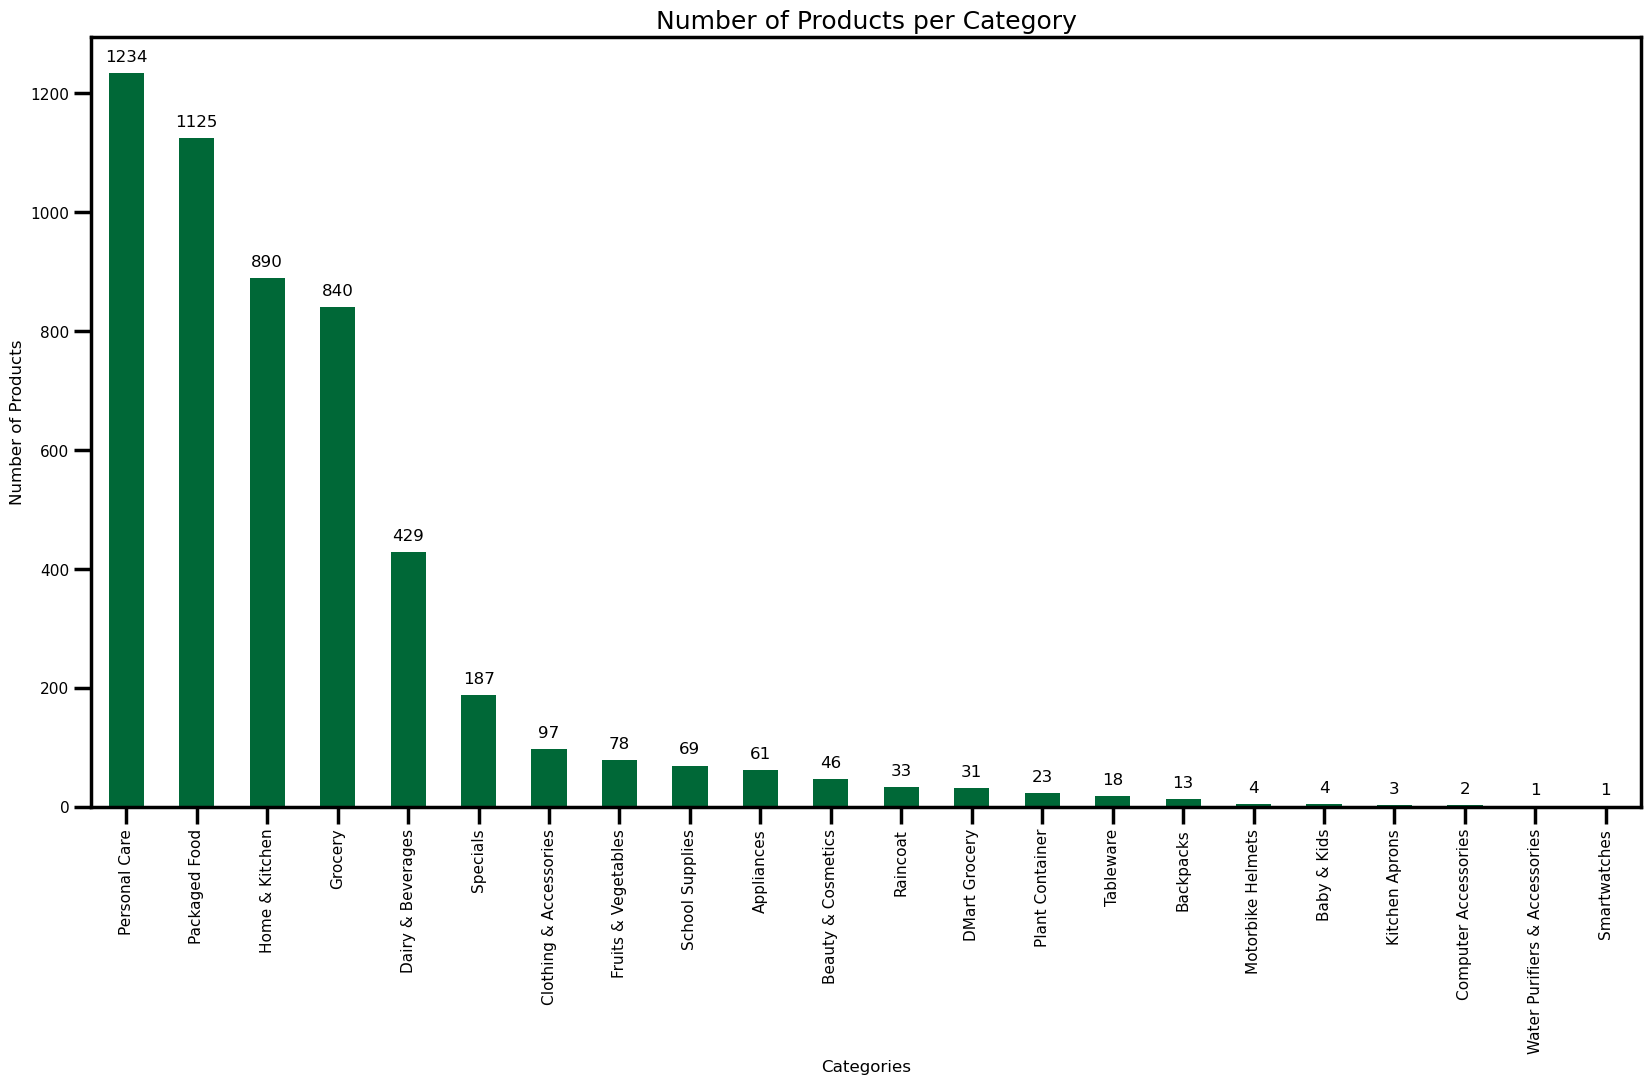

In [91]:
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.Category.value_counts().plot(kind='bar',cmap='RdYlGn_r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+20),ha='center',color='black')
    
plt.title('Number of Products per Category',fontsize=18)
plt.xlabel('Categories')
plt.ylabel('Number of Products')

In [93]:
df['SubCategory']=df['SubCategory'].replace({'Zebronics':'Appliances','Geep':'Appliances','Syska':'Home Appliances','Butterfly':'Kitchen Appliances','Wonderchef':'Kitchen Appliances','Joyo Plastics':'Kitchen Appliances','Pigeon':'Kitchen Appliances'})

In [95]:
df.SubCategory.value_counts()

SubCategory
Snacks & Farsans                 302
Masala & Spices                  297
Beverages                        282
Skin Care                        257
Face Care                        174
                                ... 
Motorbike Helmets                  4
Kitchen Aprons                     3
Computer Accessories               2
Water Purifiers & Accessories      1
Smartwatches                       1
Name: count, Length: 67, dtype: int64

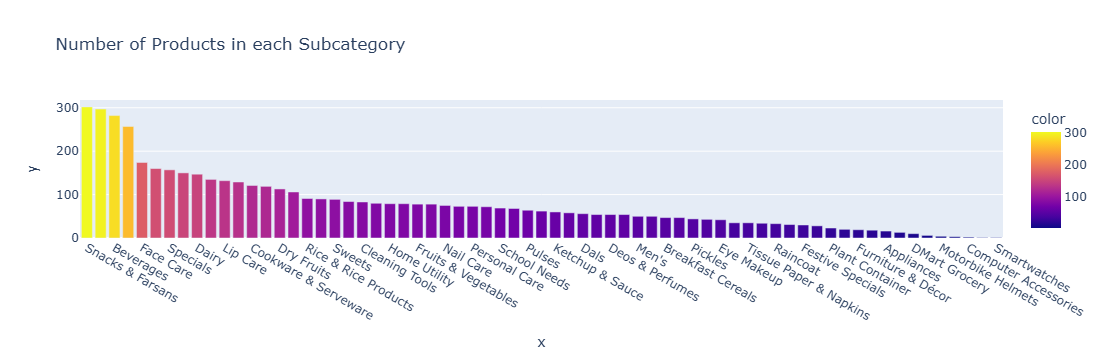

In [97]:
px.bar(x=df.SubCategory.value_counts().index, y=df.SubCategory.value_counts().values,color=df.SubCategory.value_counts().values,title='Number of Products in each Subcategory')

In [99]:
df.groupby("Category")[['SubCategory','Brand','Name']].nunique().rename(columns={"Name":'Number of Products'})

SubCategory  Brand  Number of Products
Category                                                             
Appliances                               3     20                  60
Baby & Kids                              1      2                   4
Backpacks                                1      5                  13
Beauty & Cosmetics                       2     11                  42
Clothing & Accessories                   2      9                  42
Computer Accessories                     1      1                   2
DMart Grocery                            2      3                  21
Dairy & Beverages                        2    106                 338
Fruits & Vegetables                      1      3                  76
Grocery                                  9    124                 663
Home & Kitchen                          14    188                 759
Kitchen Aprons                           1      1                   3
Motorbike Helmets                        1      2                   4
Packaged Food                           13    244                 979
Personal Care                           14    174                1070
Plant Container                          1      1                  23
Raincoat                                 1      1                  16
School Supplies                          1     20                  65
Smartwatches                             1      1                   1
Specials                                 2     42                 170
Tableware                                1      1                  10
Water Purifiers & Accessories            1      1                   1

In [101]:
df.DiscountPercent.mean()

26.023125843129698

In [103]:
df.groupby('Category')['DiscountPercent'].mean().sort_values(ascending=False)

Category
Smartwatches                     58.000000
Backpacks                        51.461538
Computer Accessories             37.500000
Appliances                       34.672131
Specials                         32.326203
Clothing & Accessories           32.123711
Plant Container                  30.521739
Beauty & Cosmetics               28.891304
Home & Kitchen                   28.819101
Packaged Food                    28.369778
Personal Care                    25.570502
DMart Grocery                    24.483871
Kitchen Aprons                   24.000000
Fruits & Vegetables              21.974359
Grocery                          21.438095
Dairy & Beverages                21.046620
Tableware                        20.500000
School Supplies                  20.289855
Motorbike Helmets                14.750000
Raincoat                         11.515152
Water Purifiers & Accessories     5.000000
Baby & Kids                       2.750000
Name: DiscountPercent, dtype: float64

In [105]:
df[df['Category']=='DMart Grocery']

Name          Brand  Price  DiscountedPrice  \
559                 Basmati Rice Mogra  Local/Unknown  375.0            289.0   
560                 Basmati Rice Mogra  Local/Unknown  750.0            549.0   
566                 Rice Pulav Basmati  Local/Unknown  500.0            398.0   
569   Basmati Rice Mini Mogra (Broken)  Local/Unknown  650.0            440.0   
575                       Rice Basmati  Local/Unknown  140.0            115.0   
585                       Biryani Rice  Local/Unknown  700.0            505.0   
588                 Rice Tibar Basmati  Local/Unknown  650.0            452.0   
595          Rice Basmati Wand : 5 kgs  Local/Unknown  800.0            526.0   
597                 Mogra Basmati Rice  Local/Unknown   72.0             61.0   
605                    Wada Kolam Rice  Local/Unknown  850.0            615.0   
606                    Wada Kolam Rice  Local/Unknown   78.0             67.0   
607                    Wada Kolam Rice  Local/Unknown  500.0            325.0   
608                   Silky Kolam Rice  Local/Unknown  460.0            279.0   
609                   Silky Kolam Rice  Local/Unknown   69.0             60.0   
610                     HMT Kolam Rice  Local/Unknown   67.0             58.0   
611                     HMT Kolam Rice  Local/Unknown  410.0            263.0   
612                     HMT Kolam Rice  Local/Unknown  700.0            495.0   
613      Eco Kolam Jirasar Sorted Rice  Local/Unknown  260.0            240.0   
614      Eco Kolam Jirasar Sorted Rice  Local/Unknown  550.0            425.0   
853                 Premia Goda Masala         Premia   28.0             19.0   
854                 Premia Akrod Whole  Local/Unknown  193.0            148.0   
856     Shree Annapurna Jaggery Powder      Annapurna  100.0             50.0   
857         GB Surti Kolam Sorted Rice  Local/Unknown  510.0            315.0   
5048                   MP Sihore Wheat  Local/Unknown  350.0            260.0   
5049                   MP Sihore Wheat  Local/Unknown  570.0            370.0   
5050                             Maida  Local/Unknown   26.0             22.0   
5051                             Maida  Local/Unknown   49.0             39.0   
5052           Jawar (Sorghum) Solapur  Local/Unknown   75.0             60.0   
5055                            Bhagar  Local/Unknown   93.0             76.0   
5057                         Idli Rava  Local/Unknown   26.0             22.0   
5058                         Idli Rava  Local/Unknown   51.0             45.0   

           Category           SubCategory Quantity  \
559   DMart Grocery  Rice & Rice Products     5 kg   
560   DMart Grocery  Rice & Rice Products    10 kg   
566   DMart Grocery  Rice & Rice Products     5 kg   
569   DMart Grocery  Rice & Rice Products    10 kg   
575   DMart Grocery  Rice & Rice Products     1 kg   
585   DMart Grocery  Rice & Rice Products     5 kg   
588   DMart Grocery  Rice & Rice Products     5 kg   
595   DMart Grocery  Rice & Rice Products     5 kg   
597   DMart Grocery  Rice & Rice Products     1 kg   
605   DMart Grocery  Rice & Rice Products    10 kg   
606   DMart Grocery  Rice & Rice Products     1 kg   
607   DMart Grocery  Rice & Rice Products     5 kg   
608   DMart Grocery  Rice & Rice Products     5 kg   
609   DMart Grocery  Rice & Rice Products     1 kg   
610   DMart Grocery  Rice & Rice Products     1 kg   
611   DMart Grocery  Rice & Rice Products     5 kg   
612   DMart Grocery  Rice & Rice Products    10 kg   
613   DMart Grocery  Rice & Rice Products     5 kg   
614   DMart Grocery  Rice & Rice Products    10 kg   
853   DMart Grocery         DMart Grocery   100 gm   
854   DMart Grocery         DMart Grocery   200 gm   
856   DMart Grocery         DMart Grocery     1 Kg   
857   DMart Grocery  Rice & Rice Products     5 kg   
5048  DMart Grocery         DMart Grocery     5 kg   
5049  DMart Grocery         DMart Grocery    10 kg   
5050  DMart Grocery         DMart Gro

In [107]:
gro_Rice = df[(df['Category']=='Grocery')&(df['SubCategory']=='Rice & Rice Products')]
gro_Rice

Name          Brand  Price  DiscountedPrice Category  \
237     Premia Poha Jada         Premia   64.0             52.0  Grocery   
238     Premia Poha Jada         Premia   33.0             27.0  Grocery   
265  Mamra (Puffed Rice)  Local/Unknown   60.0             40.0  Grocery   
282    Premia Poha Patla         Premia   37.0             30.0  Grocery   
295  Premia Poha Basmati         Premia   57.0             47.0  Grocery   
..                   ...            ...    ...              ...      ...   
626             Red Rice  Local/Unknown   67.0             51.0  Grocery   
627      Long Grain Rice  Local/Unknown  650.0            470.0  Grocery   
628       IR Boiled Rice  Local/Unknown   44.0             41.0  Grocery   
629  Masoori Boiled Rice  Local/Unknown   51.0             42.0  Grocery   
630          Satyam Sama         Satyam  100.0             93.0  Grocery   

              SubCategory Quantity  \
237  Rice & Rice Products     1 kg   
238  Rice & Rice Products   500 gm   
265  Rice & Rice Products   500 gm   
282  Rice & Rice Products   500 gm   
295  Rice & Rice Products   500 gm   
..                    ...      ...   
626  Rice & Rice Products     1 kg   
627  Rice & Rice Products    10 kg   
628  Rice & Rice Products     1 kg   
629  Rice & Rice Products     1 kg   
630  Rice & Rice Products   500 gm   

                                           Description  \
237  IngredientsRice FlakesStorageStore in a cool a...   
238                                              India   
265  Key Features - Well Cleaned - Healthy and Tast...   
282  IngredientsRice FlakesStorageStore in a cool a...   
295  IngredientsRice FlakesStorageStore in a cool a...   
..                                                 ...   
626                                              India   
627  Overview:High quality, long-grained rice to ma...   
628                                              India   
629  Overview:An everyday rice, masoori boiled rice...   
630  Overview:Sama millets or Barnyard millets are ...   

                                BreadCrumbs  DiscountPercent  
237  Grocery > Grocery/Rice & Rice Products               18  
238  Grocery > Grocery/Rice & Rice Products               18  
265  Grocery > Grocery/Rice & Rice Products               33  
282  Grocery > Grocery/Rice & Rice Products               18  
295  Grocery > Grocery/Rice & Rice Products               17  
..                                      ...              ...  
626  Grocery > Grocery/Rice & Rice Products               23  
627          Grocery > Rice & Rice Products               27  
628  Grocery > Grocery/Rice & Rice Products                6  
629  Grocery > Grocery/Rice & Rice Products               17  
630          Grocery > Rice & Rice Products                7  

[70 rows x 10 columns]

In [109]:
DMart_gro_Rice = df[(df['Category']=='DMart Grocery')&(df['SubCategory']=='Rice & Rice Products')]
DMart_gro_Rice

Name          Brand  Price  DiscountedPrice  \
559                 Basmati Rice Mogra  Local/Unknown  375.0            289.0   
560                 Basmati Rice Mogra  Local/Unknown  750.0            549.0   
566                 Rice Pulav Basmati  Local/Unknown  500.0            398.0   
569   Basmati Rice Mini Mogra (Broken)  Local/Unknown  650.0            440.0   
575                       Rice Basmati  Local/Unknown  140.0            115.0   
585                       Biryani Rice  Local/Unknown  700.0            505.0   
588                 Rice Tibar Basmati  Local/Unknown  650.0            452.0   
595          Rice Basmati Wand : 5 kgs  Local/Unknown  800.0            526.0   
597                 Mogra Basmati Rice  Local/Unknown   72.0             61.0   
605                    Wada Kolam Rice  Local/Unknown  850.0            615.0   
606                    Wada Kolam Rice  Local/Unknown   78.0             67.0   
607                    Wada Kolam Rice  Local/Unknown  500.0            325.0   
608                   Silky Kolam Rice  Local/Unknown  460.0            279.0   
609                   Silky Kolam Rice  Local/Unknown   69.0             60.0   
610                     HMT Kolam Rice  Local/Unknown   67.0             58.0   
611                     HMT Kolam Rice  Local/Unknown  410.0            263.0   
612                     HMT Kolam Rice  Local/Unknown  700.0            495.0   
613      Eco Kolam Jirasar Sorted Rice  Local/Unknown  260.0            240.0   
614      Eco Kolam Jirasar Sorted Rice  Local/Unknown  550.0            425.0   
857         GB Surti Kolam Sorted Rice  Local/Unknown  510.0            315.0   
5055                            Bhagar  Local/Unknown   93.0             76.0   

           Category           SubCategory Quantity  \
559   DMart Grocery  Rice & Rice Products     5 kg   
560   DMart Grocery  Rice & Rice Products    10 kg   
566   DMart Grocery  Rice & Rice Products     5 kg   
569   DMart Grocery  Rice & Rice Products    10 kg   
575   DMart Grocery  Rice & Rice Products     1 kg   
585   DMart Grocery  Rice & Rice Products     5 kg   
588   DMart Grocery  Rice & Rice Products     5 kg   
595   DMart Grocery  Rice & Rice Products     5 kg   
597   DMart Grocery  Rice & Rice Products     1 kg   
605   DMart Grocery  Rice & Rice Products    10 kg   
606   DMart Grocery  Rice & Rice Products     1 kg   
607   DMart Grocery  Rice & Rice Products     5 kg   
608   DMart Grocery  Rice & Rice Products     5 kg   
609   DMart Grocery  Rice & Rice Products     1 kg   
610   DMart Grocery  Rice & Rice Products     1 kg   
611   DMart Grocery  Rice & Rice Products     5 kg   
612   DMart Grocery  Rice & Rice Products    10 kg   
613   DMart Grocery  Rice & Rice Products     5 kg   
614   DMart Grocery  Rice & Rice Products    10 kg   
857   DMart Grocery  Rice & Rice Products     5 kg   
5055  DMart Grocery  Rice & Rice Products   500 gm   

                                            Description  \
559   IngredientsRiceStorage ConditionStore in a coo...   
560   Basmati Rice is classified according to its gr...   
566   StorageStore in a cool, dry, and hygienic plac...   
569   IngredientsRiceBasmati Rice is classified acco...   
575   Basmati Rice is classified according to its gr...   
585   IngredientsRiceBasmati Rice is classified acco...   
588   StorageStore in a cool, dry and hygienic place...   
595   IngredientsRiceStorageStore in a cool and dry ...   
597   OverviewThe fine long grains and the aromatic ...   
605   IngredientsRiceStorageStore in a cool, dry, an...   
606   OverviewWada Kolam Rice is used extensively in...   
607   IngredientsRiceStorage InstructionsStore in co...   
608   Overview:Kolam is a medium-size rice grain ran...   
609   Overview:Kolam is a medium-size rice grain ran...   
610   Overview:Short grained rice for everyday cooki...   
611   Overview:Short grained rice for everyday cooki...   
612   Note : Available colour will be dispatched bas...   


In [111]:
print('DMart Rice avg Price', int(DMart_gro_Rice.Price.mean()))
print('Other Rice avg Price', int(DMart_gro_Rice.Price.mean()))

print('DMart Rice avg Discount', int(DMart_gro_Rice.DiscountPercent.mean()))
print('Other Rice avg Discount', int(DMart_gro_Rice.DiscountPercent.mean()))

DMart Rice avg Price 437
Other Rice avg Price 437
DMart Rice avg Discount 24
Other Rice avg Discount 24


In [113]:
text_gro_rice = "".join(t for t in gro_Rice['Description'])

gr_wc = WordCloud(width = 1000,height=500,margin=5,colormap='gist_rainbow',background_color='white').generate(text_gro_rice)

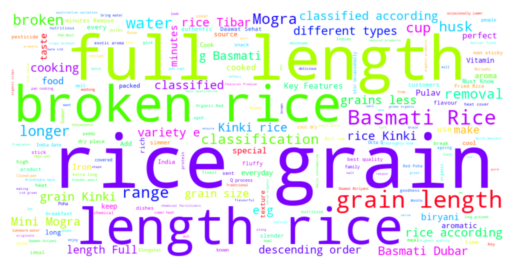

In [114]:
plt.imshow(gr_wc,interpolation='gaussian')
plt.axis('off')
plt.show()

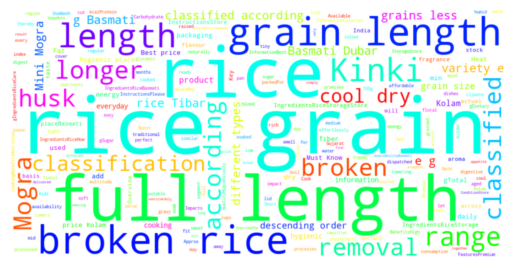

In [117]:
text_dm_gro_rice = "".join(t for t in DMart_gro_Rice['Description'])

dgr_wc = WordCloud(width = 1000,height=500,margin=5,colormap='gist_rainbow',background_color='white').generate(text_dm_gro_rice)

plt.imshow(dgr_wc,interpolation='gaussian')
plt.axis('off')
plt.show()

In [118]:
df.groupby(['Category','SubCategory','Brand'])['Brand'].count()

Category                       SubCategory                    Brand        
Appliances                     Appliances                     Ambrane           2
                                                              Duracell          2
                                                              Geep              3
                                                              Local/Unknown     1
                                                              Panasonic         2
                                                                               ..
Specials                       Specials                       Wildcraft         1
                                                              Wonderchef        2
                                                              Zebronics         5
Tableware                      Tableware                      Local/Unknown    18
Water Purifiers & Accessories  Water Purifiers & Accessories  Local/Unknown     1
Name: Brand, Length: 1

In [119]:
clothing = df[df['Category']=='Clothing & Accessories']

In [123]:
clothing.SubCategory.value_counts()

SubCategory
Men's      50
Women's    47
Name: count, dtype: int64

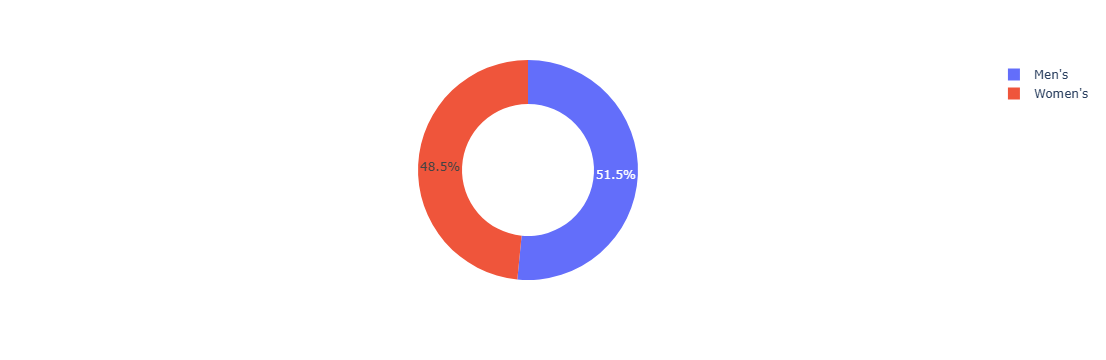

In [125]:
px.pie(values= clothing.SubCategory.value_counts().values,names =clothing.SubCategory.value_counts().index,hole=0.6)

In [127]:
clothing.groupby('SubCategory')['DiscountPercent'].mean()

SubCategory
Men's      23.680000
Women's    41.106383
Name: DiscountPercent, dtype: float64

Text(0, 0.5, 'Avg.DiscountedPrice')

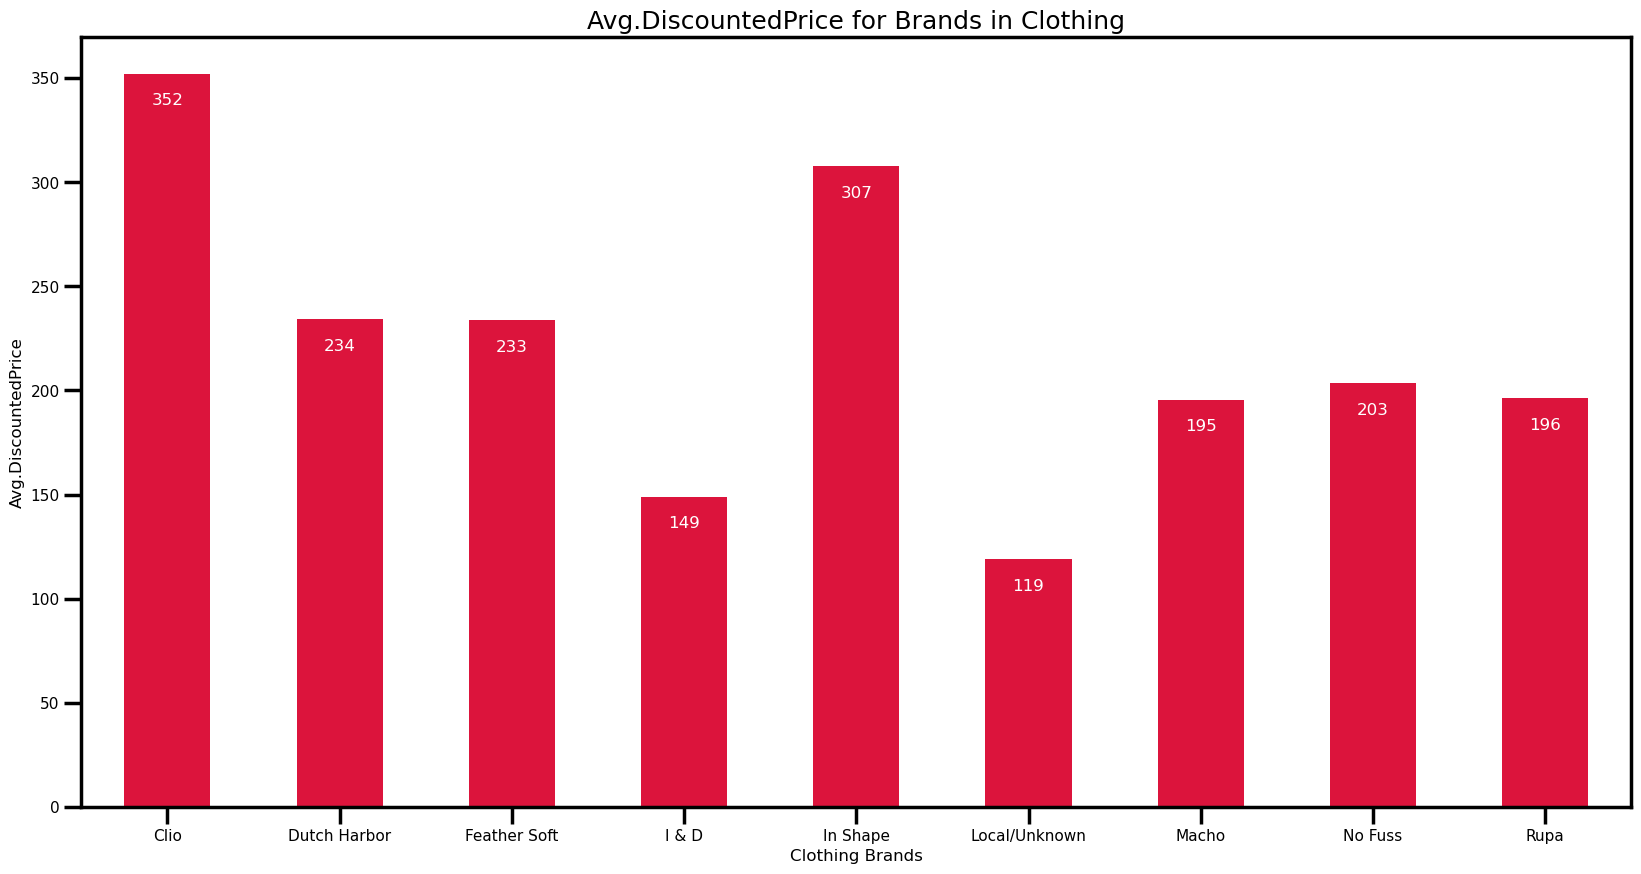

In [129]:
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = clothing.groupby('Brand')['DiscountedPrice'].mean().plot(kind='bar',color='crimson',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='white')
    
plt.title('Avg.DiscountedPrice for Brands in Clothing',fontsize=18)
plt.xlabel('Clothing Brands')
plt.ylabel('Avg.DiscountedPrice')

In [131]:
cloth_brand_mean = clothing.groupby(['Brand','SubCategory'])['DiscountedPrice'].mean().reset_index()
cloth_brand_mean

Brand SubCategory  DiscountedPrice
0           Clio     Women's       352.125000
1   Dutch Harbor       Men's       234.200000
2   Feather Soft     Women's       233.782609
3          I & D       Men's       149.000000
4       In Shape     Women's       307.666667
5  Local/Unknown       Men's       119.000000
6          Macho       Men's       195.562500
7        No Fuss       Men's       215.950000
8        No Fuss     Women's        79.000000
9           Rupa       Men's       196.166667

In [133]:
clothing[(clothing['SubCategory']=="Women's")&(clothing['DiscountPercent']>50)]

Name         Brand  Price  \
4858  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4859  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4862     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4863     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4865     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4866  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4867  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4868  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4869  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4870  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4882    Clio Ladies T-Shirt & Pyjama Nightwear Set (B2)          Clio  599.0   
4883    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4884    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4885    Clio Ladies T-Shirt & Pyjama Nightwear Set (B1)          Clio  599.0   
4886    Clio Ladies T-Shirt & Pyjama Nightwear Set (B4)          Clio  599.0   

      DiscountedPrice                Category SubCategory   Quantity  \
4858            149.0  Clothing & Accessories     Women's     Size M   
4859            149.0  Clothing & Accessories     Women's     Size L   
4862            149.0  Clothing & Accessories     Women's     Size M   
4863            149.0  Clothing & Accessories     Women's     Size L   
4865            149.0  Clothing & Accessories     Women's   Size XXL   
4866            149.0  Clothing & Accessories     Women's     Size M   
4867            149.0  Clothing & Accessories     Women's     Size L   
4868            149.0  Clothing & Accessories     Women's    Size XL   
4869            149.0  Clothing & Accessories     Women's   Size XXL   
4870            149.0  Clothing & Accessories     Women's  Size XXXL   
4882            249.0  Clothing & Accessories     Women's     Size S   
4883            249.0  Clothing & Accessories     Women's     Size S   
4884            249.0  Clothing & Accessories     Women's     Size M   
4885            249.0  Clothing & Accessories     Women's     Size S   
4886            249.0  Clothing & Accessories     Women's     Size S   

                                            Description  \
4858  \n- Brand Name : Feather Soft\n- Colour : Navy...   
4859  \n- Brand Name : Feather Soft\n- Colour : Navy...   
4862  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4863  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4865  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4866  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4867  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4868  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4869  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4870  Unique Features :Skin friendly magical soft to...   
4882  Overview- Material : 100% Cotton Jersey- GSM :...   
4883  Overview- Material : 100% Cotton Jersey- GSM :...   
4884  Overview- Material : 100% Cotton Jersey- GSM :...   
4885  Overview- Material : 100% Cotton Jersey- GSM :...   
4886  Overview- Material : 100% Cotton Jersey- GSM :...   

                           BreadCrumbs  DiscountPercent  
4858  Clothing & Accessories > Women's               70  
4859  Clothing & Accessories > Women's               70  
4862  Clothing & Accessories > Women's               70  
4863  Clothing & Accessories > Women's               70  
4865  Clothing & Accessories > Women's               70  
4866  Clothing & Accessories > Women's               70  
4867  Clothing & Accessories > Women's               70  
4868  Clothing & Accessories > Women's               70  
4869  Clothing & Accessories > Women's               70  
4870  Clothing & Accessories > Women's               70  
4882  Clothing & Accessories > Wom

In [135]:
clothing[(clothing['SubCategory']=="Women's")&(clothing['DiscountPercent']>50)]

Name         Brand  Price  \
4858  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4859  Feather Soft Navy Blue Ankle Length Legging - ...  Feather Soft  499.0   
4862     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4863     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4865     Feather Soft Red Ankle Length Legging - 1 Unit  Feather Soft  499.0   
4866  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4867  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4868  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4869  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4870  Feather Soft Skin Color Ankle Length Legging -...  Feather Soft  499.0   
4882    Clio Ladies T-Shirt & Pyjama Nightwear Set (B2)          Clio  599.0   
4883    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4884    Clio Ladies T-Shirt & Pyjama Nightwear Set (B3)          Clio  599.0   
4885    Clio Ladies T-Shirt & Pyjama Nightwear Set (B1)          Clio  599.0   
4886    Clio Ladies T-Shirt & Pyjama Nightwear Set (B4)          Clio  599.0   

      DiscountedPrice                Category SubCategory   Quantity  \
4858            149.0  Clothing & Accessories     Women's     Size M   
4859            149.0  Clothing & Accessories     Women's     Size L   
4862            149.0  Clothing & Accessories     Women's     Size M   
4863            149.0  Clothing & Accessories     Women's     Size L   
4865            149.0  Clothing & Accessories     Women's   Size XXL   
4866            149.0  Clothing & Accessories     Women's     Size M   
4867            149.0  Clothing & Accessories     Women's     Size L   
4868            149.0  Clothing & Accessories     Women's    Size XL   
4869            149.0  Clothing & Accessories     Women's   Size XXL   
4870            149.0  Clothing & Accessories     Women's  Size XXXL   
4882            249.0  Clothing & Accessories     Women's     Size S   
4883            249.0  Clothing & Accessories     Women's     Size S   
4884            249.0  Clothing & Accessories     Women's     Size M   
4885            249.0  Clothing & Accessories     Women's     Size S   
4886            249.0  Clothing & Accessories     Women's     Size S   

                                            Description  \
4858  \n- Brand Name : Feather Soft\n- Colour : Navy...   
4859  \n- Brand Name : Feather Soft\n- Colour : Navy...   
4862  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4863  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4865  \n- Brand Name : Feather Soft\n- Colour : Red\...   
4866  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4867  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4868  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4869  \n- Brand Name : Feather Soft\n- Colour : Skin...   
4870  Unique Features :Skin friendly magical soft to...   
4882  Overview- Material : 100% Cotton Jersey- GSM :...   
4883  Overview- Material : 100% Cotton Jersey- GSM :...   
4884  Overview- Material : 100% Cotton Jersey- GSM :...   
4885  Overview- Material : 100% Cotton Jersey- GSM :...   
4886  Overview- Material : 100% Cotton Jersey- GSM :...   

                           BreadCrumbs  DiscountPercent  
4858  Clothing & Accessories > Women's               70  
4859  Clothing & Accessories > Women's               70  
4862  Clothing & Accessories > Women's               70  
4863  Clothing & Accessories > Women's               70  
4865  Clothing & Accessories > Women's               70  
4866  Clothing & Accessories > Women's               70  
4867  Clothing & Accessories > Women's               70  
4868  Clothing & Accessories > Women's               70  
4869  Clothing & Accessories > Women's               70  
4870  Clothing & Accessories > Women's               70  
4882  Clothing & Accessories > Wom

In [137]:
    df[df['Category']=='Personal Care'].groupby('SubCategory')[['Brand','Name']].nunique().sort_values(by='Name',ascending=False).rename(columns={'Name':'No.of.Products'})

Brand  No.of.Products
SubCategory                                  
Skin Care                  57             194
Face Care                  26             155
Lip Care                    8             132
Hair Care                  39             124
Health & Wellness          47             104
Nail Care                   4              69
Oral Care                  14              57
Deos & Perfumes            13              53
Baby & Kids                10              47
Eye Makeup                  8              41
Shaving Needs               4              40
Personal Hygiene           11              33
Personal Care               6              16
Tissue Paper & Napkins      4               6